Task:-1
at SkillCraft Technology as a Machine learning Intern

Hose Price Prediction using Linear Regression

In [1]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the data
train_data = pd.read_csv('datasets/train (1).csv')
test_data = pd.read_csv('datasets/test.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

# Explore the data
print(train_data.head())
print(test_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
# Preprocess the data
train_data = train_data.dropna(subset=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'])

In [4]:
# Select features and target variable
X = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = train_data['SalePrice']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2806426667.247853
R-squared: 0.6341189942328371


In [9]:
# Make predictions on the test set
X_submission = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
submission_predictions = model.predict(X_submission)

# Prepare the submission file
submission = sample_submission.copy()
submission['SalePrice'] = submission_predictions
submission.to_csv('datasets/submission.csv', index=False)
print('Predictions saved to submission.csv')


Predictions saved to submission.csv


In [10]:
# Function to get user input and make a prediction
def predict_price():
    gr_liv_area = float(input("Enter the above ground living area square footage: "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    full_bath = int(input("Enter the number of full bathrooms: "))
        
    # Make a prediction based on user input
    user_input = np.array([[gr_liv_area, bedrooms, full_bath]])
    predicted_price = model.predict(user_input)
    
    print(f'Predicted house price: ${predicted_price[0]:,.2f}')

# Get user input and show prediction
predict_price()

Predicted house price: $157,156.47


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


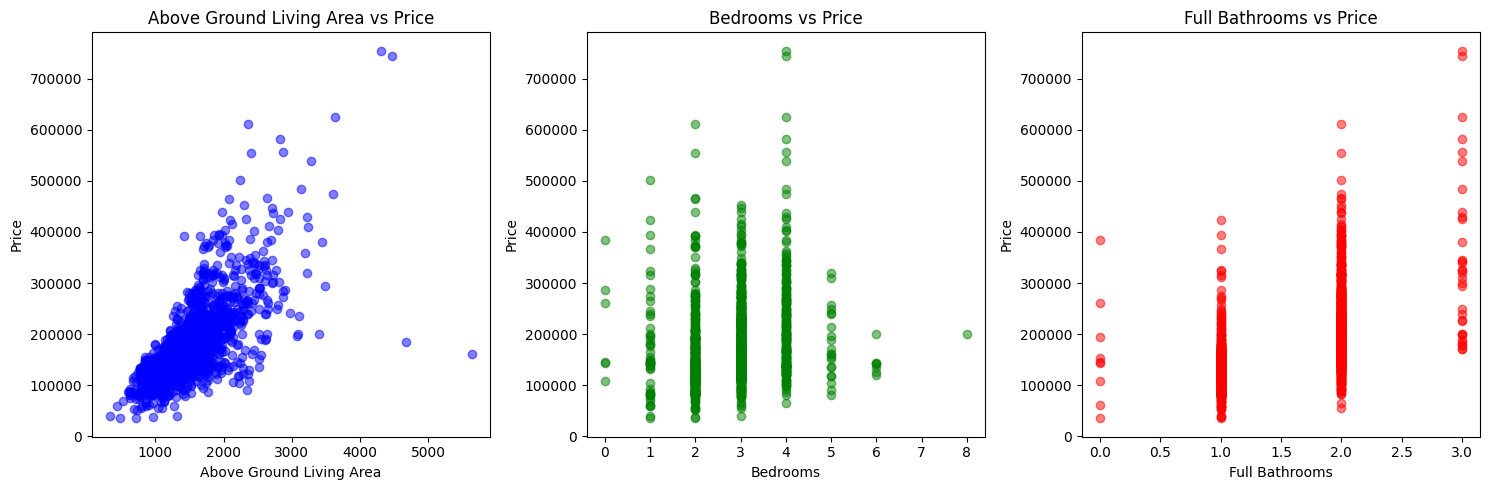

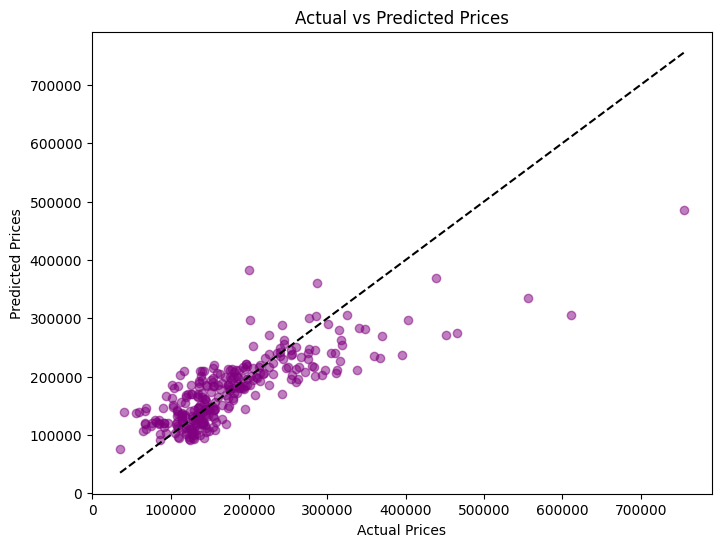

In [11]:

# Plotting
plt.figure(figsize=(15, 5))

# Scatter plot for GrLivArea vs price
plt.subplot(1, 3, 1)
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'], color='blue', alpha=0.5)
plt.title('Above Ground Living Area vs Price')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Price')

# Scatter plot for bedrooms vs price
plt.subplot(1, 3, 2)
plt.scatter(train_data['BedroomAbvGr'], train_data['SalePrice'], color='green', alpha=0.5)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

# Scatter plot for full bathrooms vs price
plt.subplot(1, 3, 3)
plt.scatter(train_data['FullBath'], train_data['SalePrice'], color='red', alpha=0.5)
plt.title('Full Bathrooms vs Price')
plt.xlabel('Full Bathrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()